<a href="https://colab.research.google.com/github/HrishiHarsora/ES114-Probability-Statistics-Data-Visualization-/blob/main/ES114_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

**Defining Required Functions**

In [ ]:
#Function to get the Marginal PMFs from the Joint PMF inputed by user
def get_PMFs(Joint_PMF):
  PMF_X=[]
  PMF_Y=[]
  for row in Joint_PMF:
    PMF_X.append(sum(row))
  PMF_X=np.round(PMF_X,2)

  for column in zip(*Joint_PMF):
    PMF_Y.append(sum(column))
  PMF_Y=np.round(PMF_Y,2)
  return PMF_X,PMF_Y

#Function to check whether or not two random variables are independent
def Independence_Check(Joint_PMF,PMF_X,PMF_Y):
  joint_PMF=np.array(Joint_PMF)
  for i,x in enumerate(PMF_X):
    for j,y in enumerate(PMF_Y):
      if abs(joint_PMF[i][j]-x*y) > 1e-2:
        return False
  return True

#function to plot a table illustrating the states of the random variables and the Joint PMF generated from them
def joint_pmf_table(joint_pmf, x_values, y_values):
    print("    ", end="")
    for x in x_values:
        print(f"{x:>10}", end="")
    print()
    for i, row in enumerate(joint_pmf):
        print(f"{y_values[i]:<4}", end="")
        for prob in row:
            print(f"{prob:>10.4f}", end="")
        print()

#Function for plotting the Joint PMF, Marginal PMFs and Joint CDFs
def plots(Joint_PMF,X_States,Y_States,PMF_X,PMF_Y,CDF_X,CDF_Y):

  fig = plt.figure(figsize=(40,5))

  X = X_States
  Y = Y_States
  X,Y = np.meshgrid(X,Y)
  X,Y = np.ravel(X),np.ravel(Y)
  Z = np.zeros_like(X)
  dx = np.ones_like(X)
  dy = np.ones_like(X)
  dz = np.ravel(Joint_PMF,order='F')

  ax = fig.add_subplot(1,6,1,projection='3d')
  ax.bar3d(X,Y,Z,dx,dy,dz,color='blue',shade=True)
  ax.set_title("PMF with X and Y")
  ax.set_xlabel("States of X")
  ax.set_ylabel("States of Y")
  ax.set_zlabel("Joint_PMF")

  ax1 = fig.add_subplot(1,6,2)
  ax1.plot(X_States,PMF_X)
  ax1.set_title("Marginal PMF X")
  ax1.set_xlabel("States of X")
  ax1.set_ylabel("PMF of X")

  ax2 = fig.add_subplot(1,6,3)
  ax2.plot(Y_States,PMF_Y)
  ax2.set_title("Marginal PMF Y")
  ax2.set_xlabel("States of Y")
  ax2.set_ylabel("PMF of Y ")


  X,Y = np.meshgrid(X_States,Y_States)
  CDF=np.reshape(np.cumsum(np.ravel(Joint_PMF)),np.shape(Joint_PMF))
  Z = CDF
  ax3 = fig.add_subplot(1,6,4,projection='3d')
  surf = ax3.plot_surface(X,Y,Z)
  ax3.set_title("Joint CDF")
  ax3.set_xlabel("States of X")
  ax3.set_ylabel("States of Y")
  ax3.set_zlabel("CDF")

  ax4 = fig.add_subplot(1,6,5)
  ax4.plot(X_States,CDF_X)
  ax4.set_title("CDF of X")
  ax4.set_xlabel("States of X")
  ax4.set_ylabel("CDF")

  ax5 = fig.add_subplot(1,6,6)
  ax5.plot(Y_States,CDF_Y)
  ax5.set_title("CDF of Y")
  ax5.set_xlabel("States of Y")
  ax5.set_ylabel("CDF")

  plt.show()


#Function to display expectation of Joint Random Variable
def expectation(Joint_PMF,X_States,Y_States):
  X,Y = np.meshgrid(X_States,Y_States)
  X,Y = np.ravel(X),np.ravel(Y)
  Z = np.ravel(Joint_PMF,order='F')
  Expectation = 0
  for i in range(len(X)):
    Expectation = Expectation + X[i]*Y[i]*Z[i]
  print("The Expectation of the Joint Random Variable is: " + str(Expectation))

#Function to display the expectation of Joint Random Variable generated from two random variables which are functions of the original ones
def expectation2(X_States,Y_States,PMF_X,PMF_Y):
  #Finding Expectation of Random Variable X
  E_X=0
  for i in range(len(X_States)):
    E_X = E_X + X_States[i]*PMF_X[i]

  #Finding Expectation of Random Variable Y
  E_Y=0
  for j in range(len(Y_States)):
    E_Y = E_Y + Y_States[j]*PMF_Y[j]

  #Defining New Random Variables which are functions of the original ones. One to One mapping of the PMFs
  X1 = X_States-E_X
  Y1 = Y_States-E_Y

  #PMF of the a new joint random variable generated from two independent random variables
  New_Joint_PMF = []
  for i in range(len(X1)):
    for j in range(len(Y1)):
      New_Joint_PMF.append(PMF_X[i]*PMF_Y[j])

  #Finding Expectation of the new joint random variable
  E_X1_Y1 = 0
  for k in range(len(X1)):
    E_X1_Y1 = E_X1_Y1 + X1[k]*Y1[k]*New_Joint_PMF[k]

  print("The Expectation of the Joint PMF of the new Random Variable is: " + str(E_X1_Y1))


def get_CDF(PMF):
  CDF = np.cumsum(PMF)
  return CDF



*NOTE: If we use the random number generating functionality of Python to generate a Joint PMF, then the corresponding Marginal PMFs that are calculated shall also be random. In this randomness, the event that the calculated Marginal PMFs are independent is very unlikely. Hence, Here I am providing 3 examples where the Joint PMF has been modelled carefully to produce the desired result  *

**Example 1**

In [ ]:
#States of random variables X and Y

X_States = [1,2]
Y_States = [1,2]

#Taking Input of Joint PMF
print("Enter Joint PMF Row by Row: ")
Joint_PMF=[]
for _ in range(len(Y_States)):
  row = list(map(float,input().split()))
  Joint_PMF.append(row)

for row in Joint_PMF:
  for element_index in range(len(row)):
    r = round(row[element_index],2)
    row[element_index]=r

print("The Joint PMF Table: ")
joint_pmf_table(Joint_PMF,X_States,Y_States)

# print(Joint_PMF)

#Getting Marginal PMFs from Joint PMF
PMF_X,PMF_Y = get_PMFs(Joint_PMF)

Enter Joint PMF Row by Row: 
0.3 0.2 
0.1 0.4
The Joint PMF Table: 
             1         2
1       0.3000    0.2000
2       0.1000    0.4000


In [ ]:
Answer = Independence_Check(Joint_PMF,PMF_X,PMF_Y)
print(Answer)

False


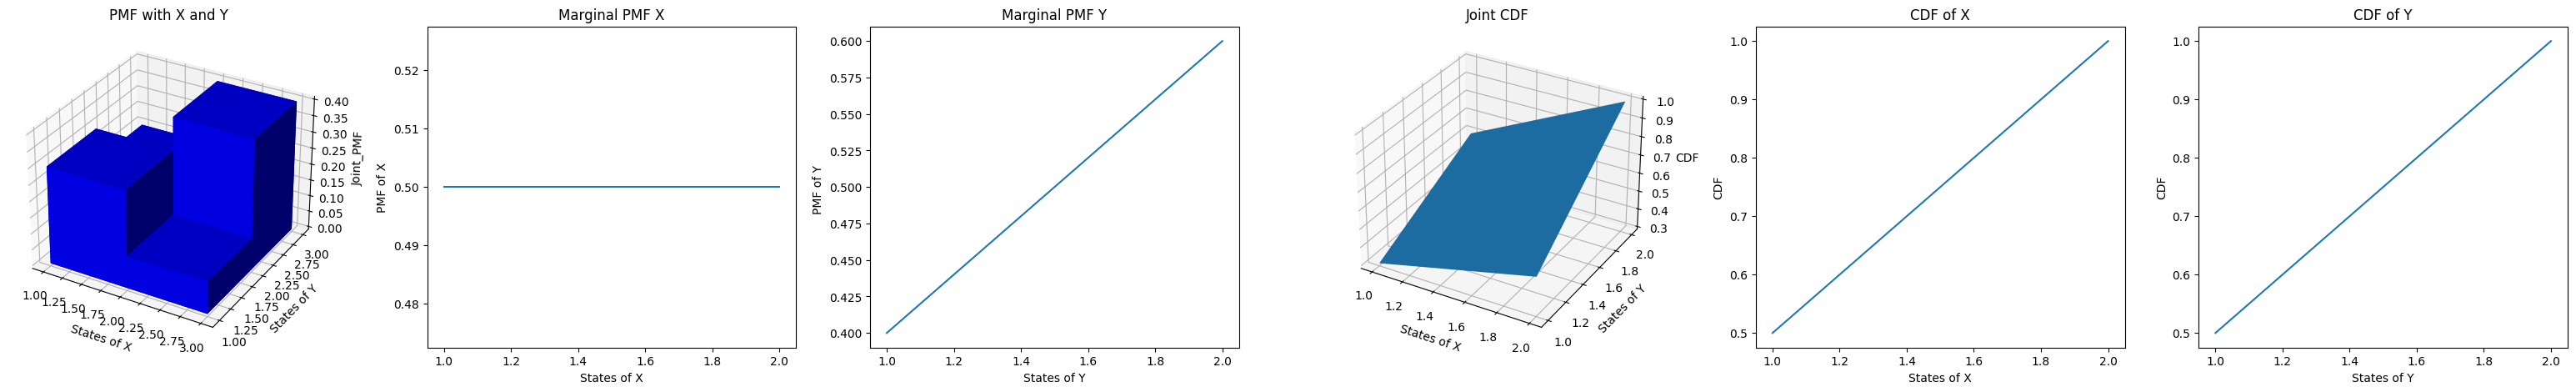

In [ ]:
#Plotting
CDF_X = get_CDF(PMF_X)
CDF_Y = get_CDF(PMF_X)
plots(Joint_PMF,X_States,Y_States,PMF_X,PMF_Y,CDF_X,CDF_Y)

In [ ]:
#For E[XY]

expectation(Joint_PMF,X_States,Y_States)

#For E[X1Y1]

#As the Marginal Random Variables are not independent we can determine X1 and Y1 but we CANNOT determine the Joint Random
#Variable of X1 and Y1 because we cannot find the Joint PMF from the Marginal PMFs unless and until the Marginal PMFs are
#independent

The Expectation of the Joint Random Variable is: 2.5


**Example 2**

In [ ]:
#States of random variables X and Y

X_States = [0,1]
Y_States = [0,1]

#Taking Input of Joint PMF
print("Enter Joint PMF Row by Row: ")
Joint_PMF=[]
for _ in range(len(Y_States)):
  row = list(map(float,input().split()))
  Joint_PMF.append(row)

for row in Joint_PMF:
  for element_index in range(len(row)):
    r = round(row[element_index],2)
    row[element_index]=r

print("The Joint PMF Table: ")
joint_pmf_table(Joint_PMF,X_States,Y_States)

# print(Joint_PMF)

#Getting Marginal PMFs from Joint PMF
PMF_X,PMF_Y = get_PMFs(Joint_PMF)

Enter Joint PMF Row by Row: 
0.25 0.25
0.25 0.25 
The Joint PMF Table: 
             0         1
0       0.2500    0.2500
1       0.2500    0.2500


In [ ]:
Answer = Independence_Check(Joint_PMF,PMF_X,PMF_Y)
print(Answer)

True


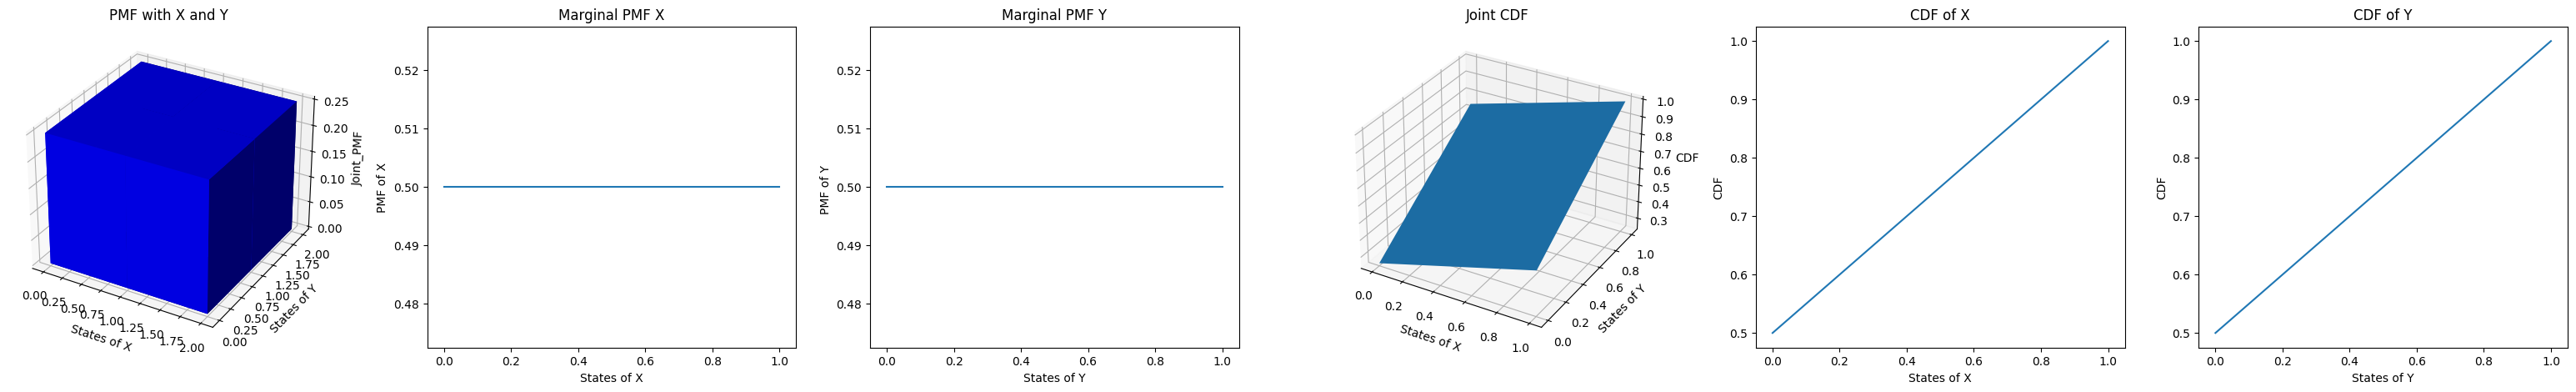

In [ ]:
CDF_X = get_CDF(PMF_X)
CDF_Y = get_CDF(PMF_Y)
plots(Joint_PMF,X_States,Y_States,PMF_X,PMF_Y,CDF_X,CDF_Y)

In [ ]:
#For E[XY]

expectation(Joint_PMF,X_States,Y_States)

#For E[X1Y1]

expectation2(X_States,Y_States,PMF_X,PMF_Y)

The Expectation of the Joint Random Variable is: 0.25
The Expectation of the Joint PMF of the new Random Variable is: 0.125


**Example 3**

In [ ]:
#States of random variables X and Y

X_States = [1,2,3,4,5,6]
Y_States = [1,2]

#Taking Input of Joint PMF
print("Enter Joint PMF Row by Row: ")
Joint_PMF=[]
for _ in range(len(Y_States)):
  row = list(map(float,input().split()))
  Joint_PMF.append(row)

for row in Joint_PMF:
  for element_index in range(len(row)):
    r = round(row[element_index],2)
    row[element_index]=r

print("The Joint PMF Table: ")
joint_pmf_table(Joint_PMF,X_States,Y_States)

# print(Joint_PMF)

#Getting Marginal PMFs from Joint PMF
PMF_X,PMF_Y = get_PMFs(Joint_PMF)

Enter Joint PMF Row by Row: 
0.083 0.083 0.083 0.083 0.083 0.083 
0.083 0.083 0.083 0.083 0.083 0.083 
The Joint PMF Table: 
             1         2         3         4         5         6
1       0.0800    0.0800    0.0800    0.0800    0.0800    0.0800
2       0.0800    0.0800    0.0800    0.0800    0.0800    0.0800


In [ ]:
Answer = Independence_Check(Joint_PMF,PMF_X,PMF_Y)
print(Answer)

True


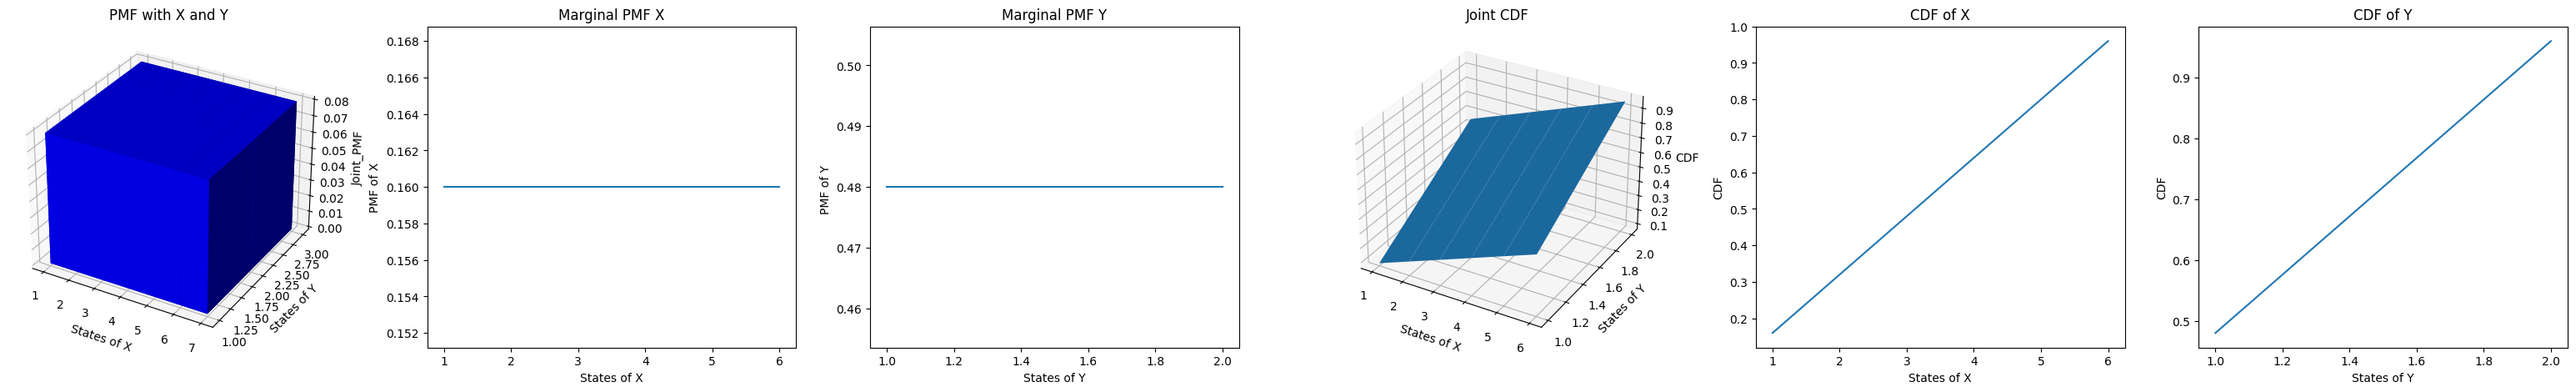

In [ ]:
CDF_X = get_CDF(PMF_Y)
CDF_Y = get_CDF(PMF_X)
plots(Joint_PMF,X_States,Y_States,PMF_Y,PMF_X,CDF_X,CDF_Y)

In [ ]:
#For E[XY]
expectation(Joint_PMF,X_States,Y_States)

#For E[X1Y1]
X_States,Y_States=Y_States,X_States
expectation2(X_States,Y_States,PMF_X,PMF_Y)

The Expectation of the Joint Random Variable is: 5.04
The Expectation of the Joint PMF of the new Random Variable is: 0.021258239999999977
